# R is Awsome!

- Oliver Will
- 2021-02-18
- v2

Anaconda installed R version 3.6.1. I don't know how to check the version from withing Jupyter Lab. 

I always check if the namespace is empty.

In [4]:
ls()

character(0)

## Three programming concepts

1. Variable assignment

In [6]:
# Example of variables assignment
x <- 2
x

# A variables in R can take anything
x <- "Hello World"
x

[1] 2

[1] "Hello World"

2. Functions

In [8]:
# Example of a function assignment
f <- function(x, y)
    {x+y}
f(2,3)

[1] 5

R has a method to delete variables or functions

In [9]:
rm(x)
rm(f)
ls()

character(0)

3. Adding a package

In [10]:
# The package has already been installed
# install.packages("ggplot2")
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Simulate a dataset

It's easy to get into Markdown in Jupyter and it can handle $LaTex$. RStudio has good integration with R markdown, but I rarely use that. 

We'll create a data set of 100 data points. 

Simulate a regression of the form \begin{equation}y=\beta_0+\beta_1 x+\epsilon\end{equation}

where $\epsilon \sim \text{Normal}(0, \sigma=4)$.

Make it easy and let $\beta_0 = 5$ and $\beta_1 = 2$.

$x$ will be simulated from a $\text{Normal}(\mu = 0, \sigma = 4)$ and $\epsilon \sim \text{Normal}(\mu = 0, \sigma = 4)$.

In [22]:
set.seed(4)
# Set of functions rnorm, dnorm, pnorm, and qnorm.
x <- rnorm(100, 0, 4)
y <- 5+2*x+rnorm(100, 0, 4)
mean(x)
sd(x)
mean(y)
# Sum of normals is normal. Std is sum of sqrt of the sum of squares.
print("Std of y")
sqrt(2^2*4^2+4^2)
sd(y)

df <- data.frame(x=x, y=y)

# R doesn't tell you what the variable memory is
head(df)
head(df[, "x"])

[1] 0.3860999

[1] 3.655492

[1] 5.46777

[1] "Std of y"


[1] 8.944272

[1] 7.871246

x,y
0.8670195,9.4732466
-2.1699703,0.1996054
3.5645786,10.7032564
2.3839223,9.3447582
6.5424720,18.2644752
2.7571018,3.6095106


[1]  0.8670195 -2.1699703  3.5645786  2.3839223  6.5424720  2.7571018

# Plot the data

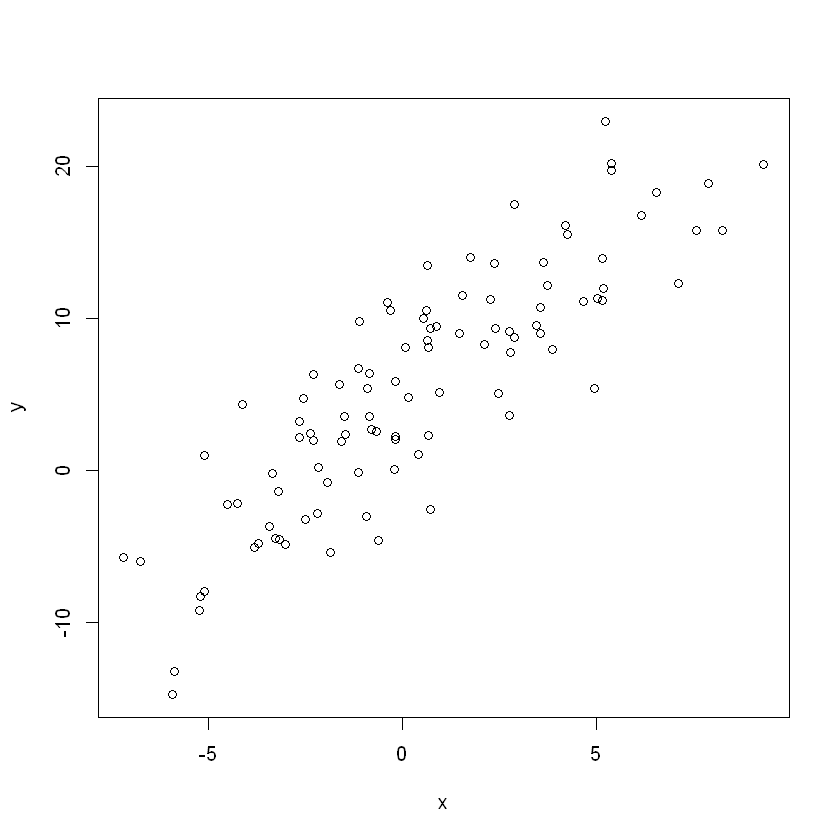

In [23]:
plot(x, y)

Maybe we need to enter the Tidyverse?

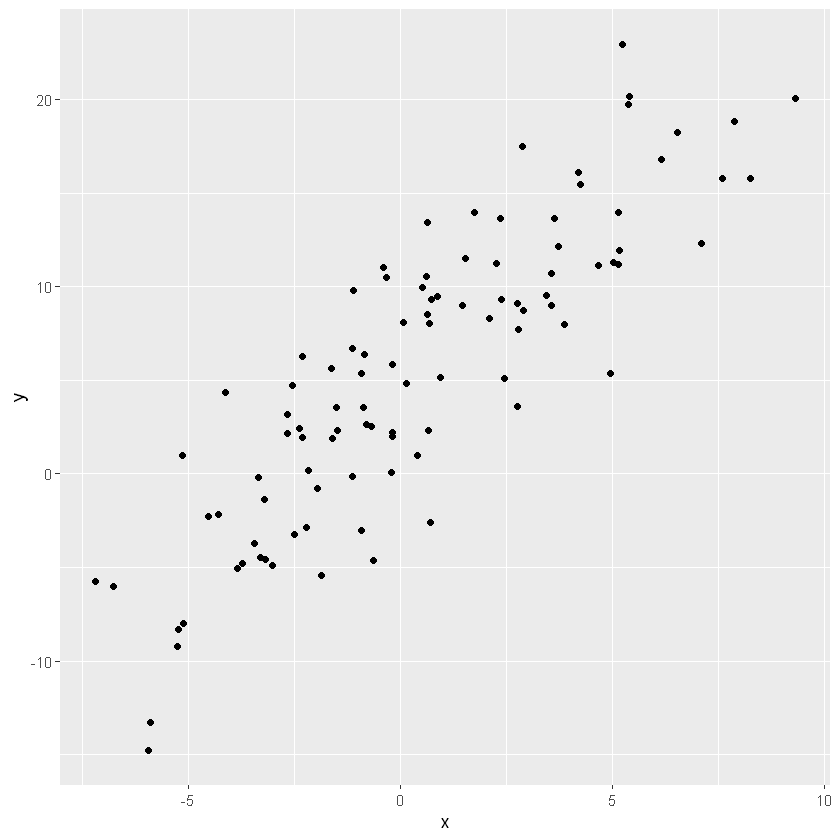

In [25]:
# library("ggplot2")
qplot(x, y, data=df)

# Linear regression

We'll fit a linear regression with OLS. We haven't discussed residuals yet. 

The $i^\text{th}$ residual is $e_i=y_i-\hat{y}_i$ where $\hat{y}$ is the predicted value of $y$.

In [26]:
fm <- lm(y~x, data=df)
summary(fm)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6775 -2.8440 -0.2084  2.9105  8.5184 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7529     0.4061   11.70   <2e-16 ***
x             1.8516     0.1110   16.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.038 on 98 degrees of freedom
Multiple R-squared:  0.7394,	Adjusted R-squared:  0.7368 
F-statistic: 278.1 on 1 and 98 DF,  p-value: < 2.2e-16


In [34]:
# What is in the lm object?
ls(fm)
ls(summary(fm))

[1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"

[1] "adj.r.squared" "aliased"       "call"          "coefficients" 
 [5] "cov.unscaled"  "df"            "fstatistic"    "r.squared"    
 [9] "residuals"     "sigma"         "terms"

# Plot the line

Through the scatter plot.

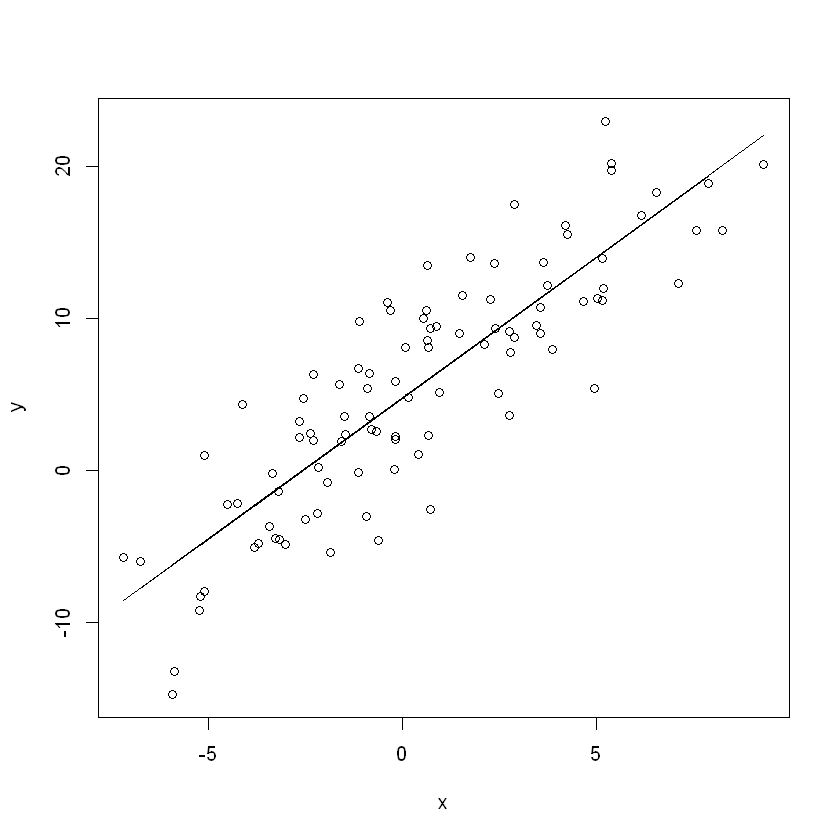

In [27]:
plot(x, y)
lines(x, predict(fm, df))

# Regression exploration
We want to explore the regression line. 
- Means are on the regression line
- The slope is $r \times \sigma_y/\sigma_x$
- Solve for intercept

In [35]:
m_x <- mean(df[,"x"])
m_y <- mean(df[,"y"])

b0 <- fm$coef[1]
b1 <- fm$coef[2]
print("Are the means on the same line?")
print(m_y == b0+b1*m_x)

[1] "Are the means on the same line?"
(Intercept) 
       TRUE 


In [36]:
print(m_y)
print(b0+b1*m_x)

[1] 5.46777
(Intercept) 
    5.46777 


I don't understand where all the digits of percision went?

In [37]:
print("Is the formula for slope correct?")
print(b1)
print(cor(df[,"x"], df[,"y"])*sd(df[,"y"])/sd(df[,"x"]))

[1] "Is the formula for slope correct?"
       x 
1.851588 
[1] 1.851588


In [41]:
# Weird. Not getting control of the print statement like I thought.
print("What about the intercept?")
print(b0)
print(m_y-b1*m_x)

[1] "What about the intercept?"
(Intercept) 
   4.752872 
       x 
4.752872 


# Check the model assumptions
1. Linear and additive
2. Errors are independent
3. Errors are normal
4. Errors are equal variance

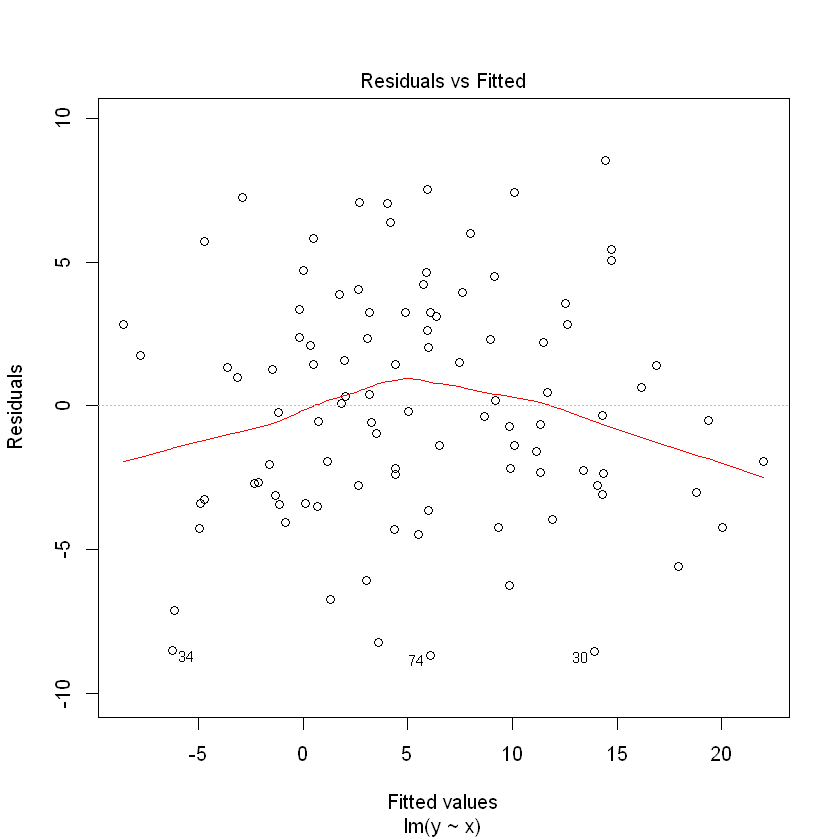

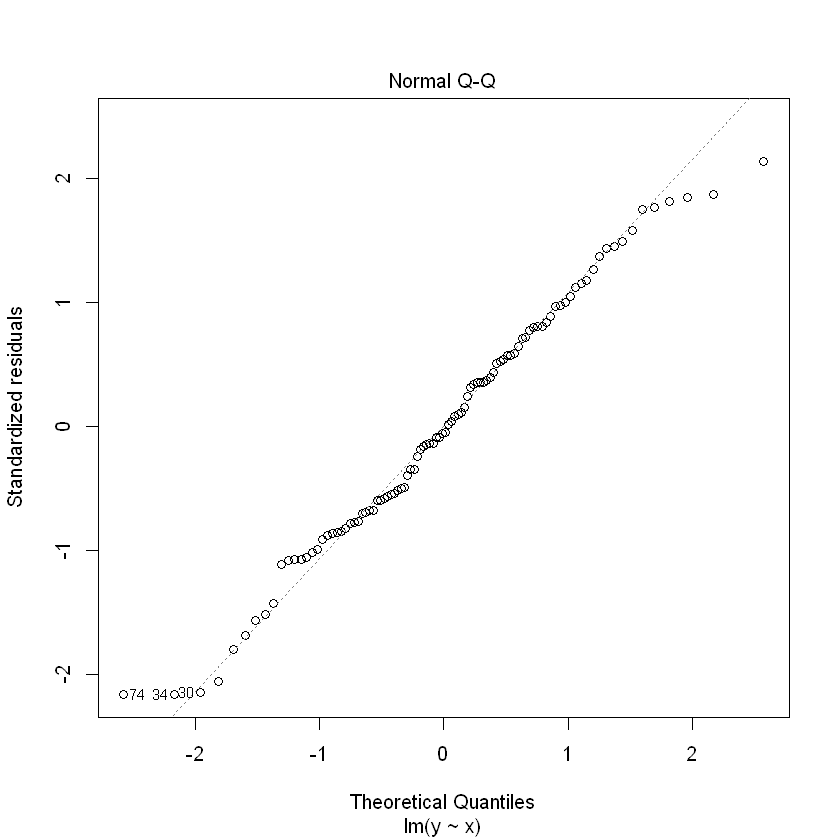

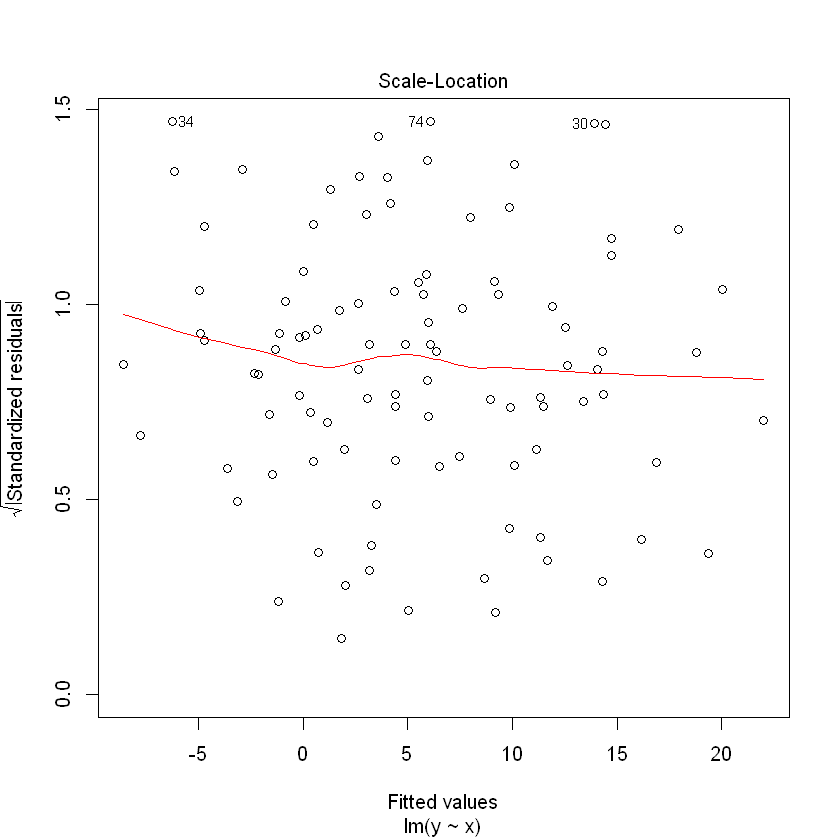

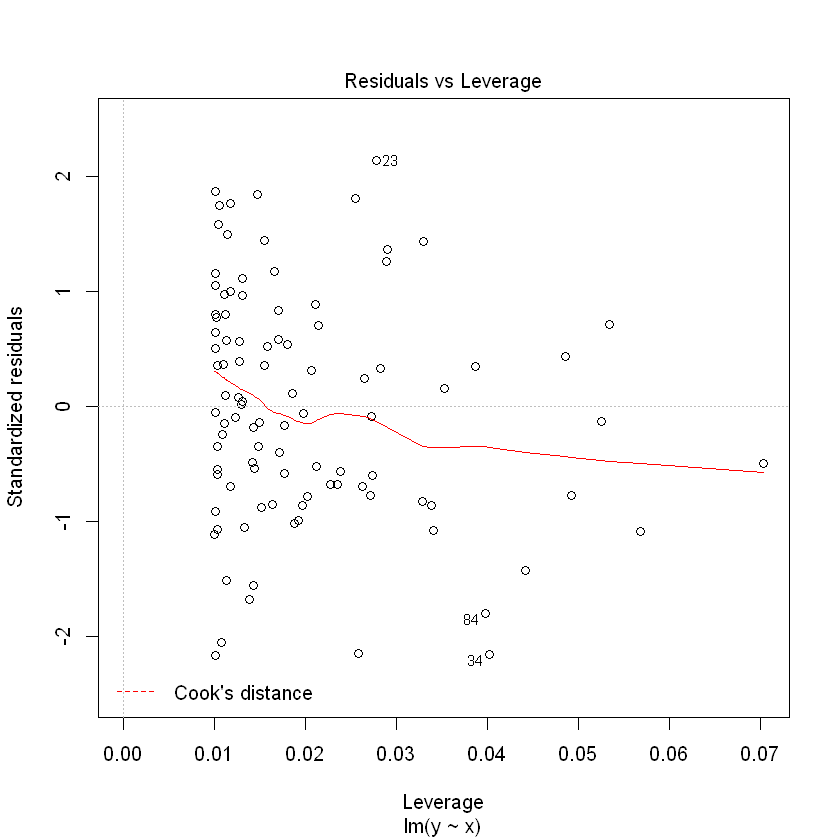

In [35]:
plot(fm)

R has made these plots since the first time I ran it. 
- "Residuals vs Fitted" Gives an idea that the errors are independent and equal. Of course, it looks good.
- "Normal Q-Q" Best graphical way to evaluate normality. Plotting the quantiles of the normal (if you had 100 points, what's the 100th quantile of the normal) against the residuals. Basically, if residuals come from the a normal distribution, they'll fall on a line. 
- "Scale-Location" Like the residuals vs fitted but using the predicted y values. Again, it's for the independence of errors and equal error variance.
- "Residuals vs Leverage" I actually use this graph, but I typically look at the values that are numbered. If it's over 5% of the data, I worry. Levarge is defined in terms of the vector solution for linear regression. In a general sense, I interpret it as how far away a predictor is from the others. Standardized residuals we know. Cook's distance is the average standardized change in the estimated $y$ when an observation is removed. 

I would try to find obserations 23, 34, and 84 on the scatter versus line graph to see what's going on. 

# Did the 3 programming languages produce simulate data from the same distribution?

I find the scatter plots weird. Are these really the same distributions?

In [37]:
write.csv(df, "r_simulation.csv", row.names=FALSE)

In [39]:
df_julia <- read.csv("julia_simulation.csv")
head(df_julia)

x,y
-7.6448531,-19.093772
-0.4003392,6.218542
-1.5154872,4.099552
8.1503993,22.425534
-5.5234641,-7.382095
-3.3438098,9.532128


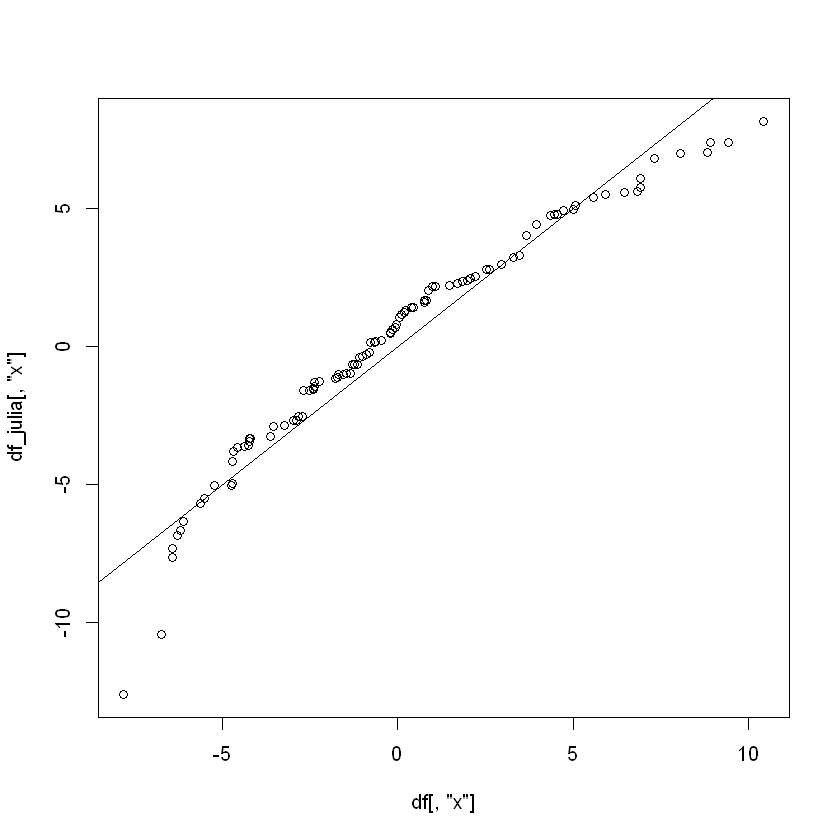

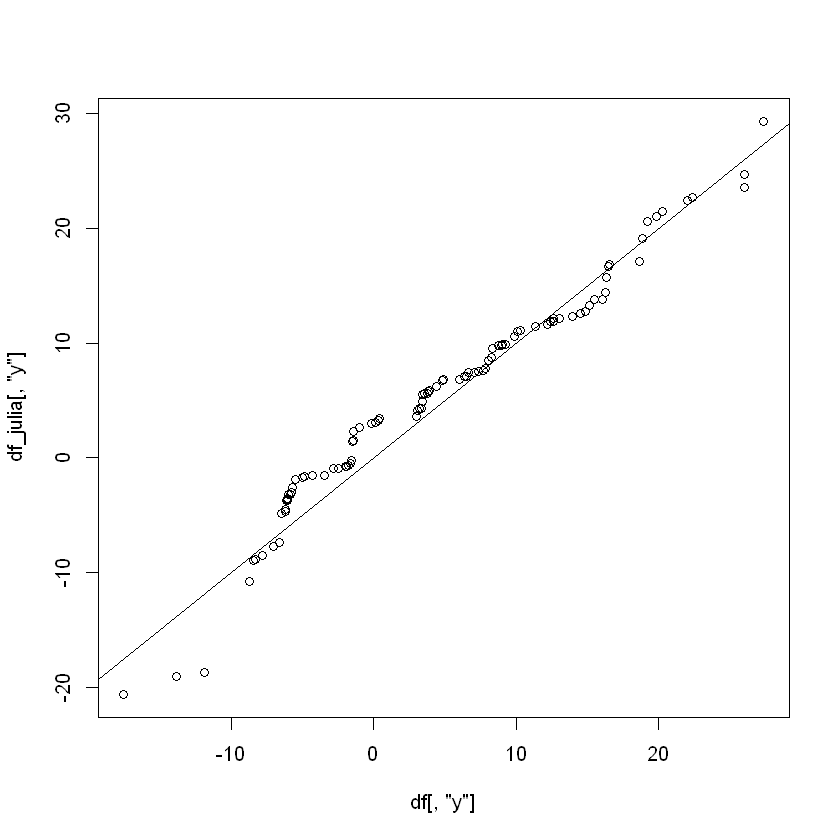

In [55]:
qqplot(df[,"x"], df_julia[,"x"])
abline(0, 1)
qqplot(df[,"y"], df_julia[,"y"])
abline(0, 1)

In [46]:
df_python <- read.csv("python_simulation.csv")

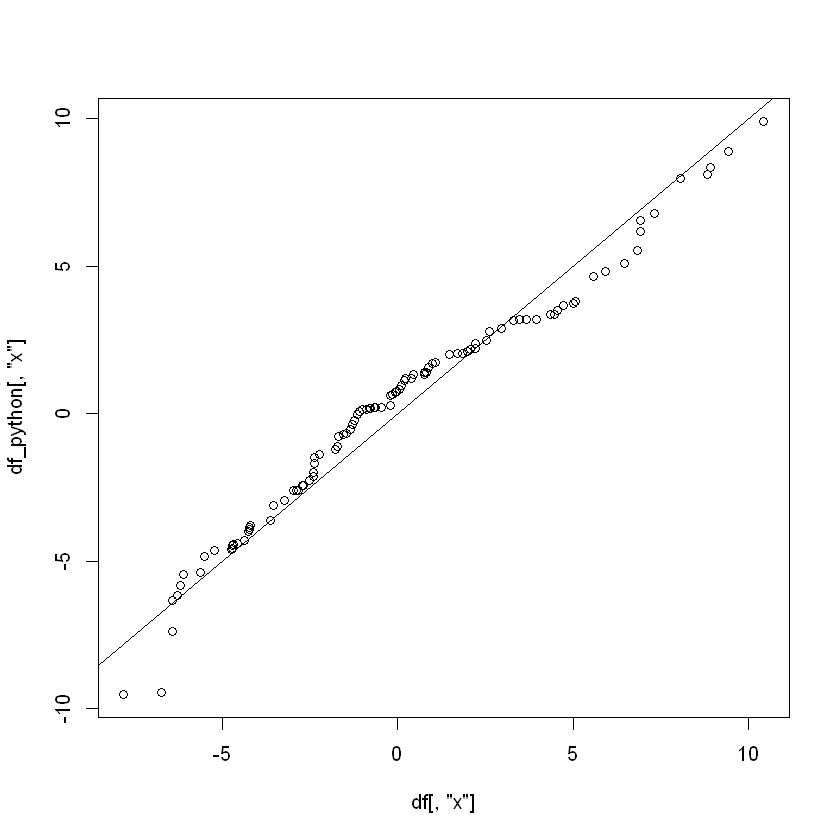

In [54]:
qqplot(df[,"x"], df_python[, "x"])
abline(0, 1)

In [53]:
mean(df[,"x"])
mean(df_python[,"x"])
mean(df_julia[,"x"])

[1] -0.04082702

[1] 0.1410943

[1] 0.172011

In [51]:
mean(df[,"y"])
mean(df_python[,"y"])
mean(df_julia[,"y"])

[1] 5.46777

[1] 5.369421

[1] 5.33544

# Assumption violations?
We have a new data set. Found here. (If I understood GitHub better, I'd download directly from there. 

https://github.com/mattharrison/xkcd-Curve-Fitting-Data-2048

In [42]:
df_xkcd <- read.csv("xkcd_2048_mattharrison.csv")

In [ ]:
plot(df_xkcd[,"x"], df_xkcd[,"y"]